In [34]:
"""
from prophet docs
"""
import pandas as pd
import numpy as np
from datetime import datetime
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
import json
from fbprophet.serialize import model_to_json, model_from_json

# !pip install pystan
# !pip install fbprophet
# !pip install plotly
# !pip install ipywidgets

# State %-production share
# MAHARASHTRA 29.59
# MADHYA PRADESH 15.16
# KARNATAKA 13.64
# GUJARAT 6.42
# BIHAR 6.25
# RAJASTHAN 4.80
# ANDHRA PRADESH 5.02
# source: http://agricoop.gov.in/sites/default/files/Monthly%20Report%20on%20Onion%20for%20May%2C%202018.pdf



$$y(t)=g(t)+s(t)+h(t)+\epsilon _t$$
$$g(t)=\frac{C}{1+}$$
$$s(t)=\sum_{n=1}^{N}\bigg(a_n \cos\Big(\frac{2\pi nt}{P}\Big) + b_n \sin\Big(\frac{2\pi nt}{P}\Big)\bigg)$$
$$$$
```
model {
// Priors
    k∼normal(0, 5);
    m∼normal(0, 5);
    epsilon∼normal(0, 0.5);
    delta∼double_exponential(0, tau);
    beta∼normal(0, sigma);
    // Logistic likelihood
    y∼normal(C ./ (1 + exp(-(k + A * delta) .* (t - (m + A * gamma)))) +X * beta, epsilon);
    // Linear likelihood
    y∼normal((k + A * delta) .* t + (m + A * gamma) + X * beta, sigma);
}
```

In [9]:
df = pd.read_csv('full_onion_data.csv')
df = df.drop(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX'], axis= 1)
df['ds'] = df['DATE'].apply(lambda x: datetime.strptime(x, "%d %b %Y"))
df['y'] = df['MODAL'].apply(lambda x: int(x))

In [10]:
df.dtypes

MODAL           float64
DATE             object
ds       datetime64[ns]
y                 int64
dtype: object

In [11]:
df.head()

MODAL         DATE         ds     y
0  1625.0  31 Aug 2020 2020-08-31  1625
1  1550.0  29 Aug 2020 2020-08-29  1550
2  1600.0  28 Aug 2020 2020-08-28  1600
3  1650.0  27 Aug 2020 2020-08-27  1650
4  1450.0  26 Aug 2020 2020-08-26  1450

In [12]:
m = Prophet()
# Prophet.add_country_holidays(m, "India")
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
3042 2021-08-27
3043 2021-08-28
3044 2021-08-29
3045 2021-08-30
3046 2021-08-31

In [13]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds         yhat   yhat_lower   yhat_upper
3042 2021-08-27  2805.628767  1857.976693  3650.461556
3043 2021-08-28  2805.692639  1963.621368  3753.529077
3044 2021-08-29  2875.739055  1980.322486  3757.622732
3045 2021-08-30  2862.179410  1962.083696  3710.985583
3046 2021-08-31  2890.379778  2014.568346  3728.743898

In [14]:
with open('serialized_model.json', 'w') as fout:
    json.dump(model_to_json(m), fout)  # Save model

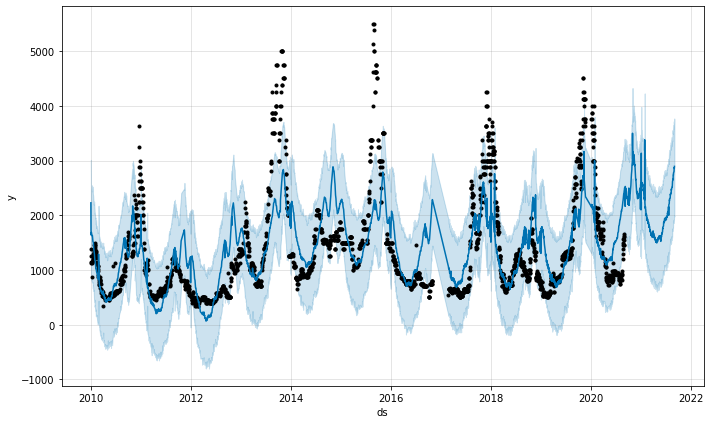

In [16]:
fig1 = m.plot(forecast)

/home/manu/.local/lib/python3.8/site-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/home/manu/.local/lib/python3.8/site-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



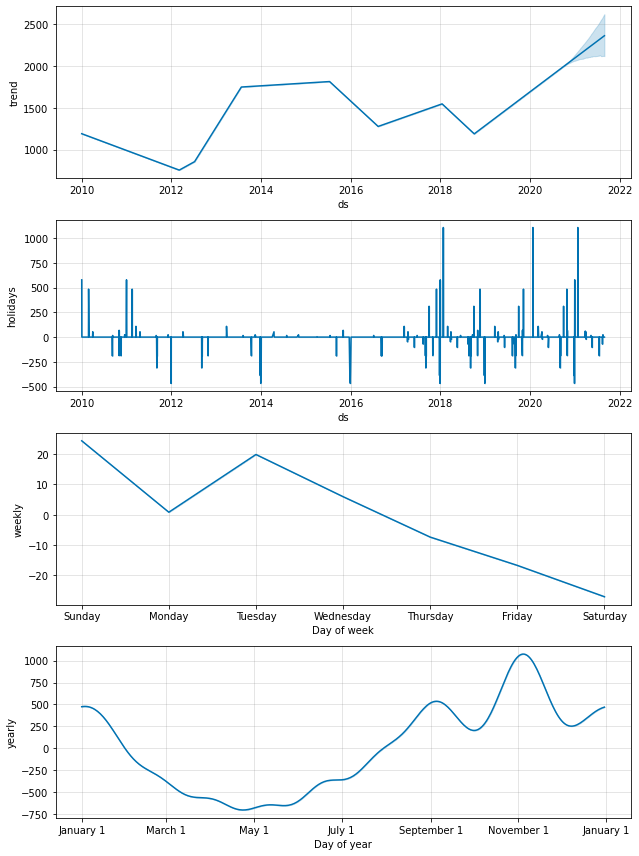

In [17]:
fig2 = m.plot_components(forecast)

In [18]:
plot_plotly(m, forecast)

In [19]:
plot_components_plotly(m, forecast)

/home/manu/.local/lib/python3.8/site-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/home/manu/.local/lib/python3.8/site-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/home/manu/.local/lib/python3.8/site-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



In [5]:
wt = pd.read_csv('imd_div_17.csv')
wt.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS',
       'OND'],
      dtype='object')

In [22]:
wt.head()

SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  Andaman & Nicobar Islands  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  Andaman & Nicobar Islands  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  Andaman & Nicobar Islands  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  Andaman & Nicobar Islands  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  Andaman & Nicobar Islands  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL     JF    MAM    JJAS  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2  136.3  560.3  1696.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7  159.8  458.3  2185.9   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4  156.7  236.1  1874.0   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6   24.1  506.9  1977.6   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7    1.3  309.7  1624.9   

     OND  
0  980.3  
1  716.7  
2  690.6  
3  571.0  
4  630.8

In [23]:
# wt = wt.drop(['Unnamed: 0', 'ANNUAL', 'JF', 'MAM', 'JJAS', 'OND'], axis= 1)
# df['ds'] = df['DATE'].apply(lambda x: datetime.strptime(x, "%d %b %Y"))
# df['y'] = df['MODAL'].apply(lambda x: int(x))

In [6]:
fn = pd.DataFrame(columns=['SUBDIVISION', 'YEAR', 'MONTH', 'RAIN'])
mon = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
for i in range(12):
    tmp = wt.copy()
    tmp['MONTH'] = i+1
    tmp['RAIN'] = tmp[mon[i]]
    fn = pd.concat([fn, tmp[['SUBDIVISION', 'YEAR', 'MONTH', 'RAIN']]])
    


In [7]:
fn.head()

SUBDIVISION  YEAR MONTH  RAIN
0  Andaman & Nicobar Islands  1901     1  49.2
1  Andaman & Nicobar Islands  1902     1   0.0
2  Andaman & Nicobar Islands  1903     1  12.7
3  Andaman & Nicobar Islands  1904     1   9.4
4  Andaman & Nicobar Islands  1905     1   1.3

In [8]:
fn = fn[fn['SUBDIVISION'] == 'Madhya Maharashtra']
fn

SUBDIVISION  YEAR MONTH  RAIN
2668  Madhya Maharashtra  1901     1  18.8
2669  Madhya Maharashtra  1902     1   7.8
2670  Madhya Maharashtra  1903     1   7.6
2671  Madhya Maharashtra  1904     1   0.4
2672  Madhya Maharashtra  1905     1   0.0
...                  ...   ...   ...   ...
2780  Madhya Maharashtra  2013    12   1.3
2781  Madhya Maharashtra  2014    12  13.1
2782  Madhya Maharashtra  2015    12   0.1
2783  Madhya Maharashtra  2016    12   0.9
2784  Madhya Maharashtra  2017    12   5.1

[1404 rows x 4 columns]

In [9]:
tmp = []
for i in range(len(df['ds'])):
    tmp.append(fn[(fn['YEAR'] == df['ds'][i].year) & (fn['MONTH'] == df['ds'][i].month) &
                 (fn['SUBDIVISION'] == 'Madhya Maharashtra')]['RAIN'])


In [10]:
ro = []
for i in tmp:
    if len(i.values): ro.append(i.values[0])
    else: ro.append(0)
print(ro[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [11]:
df['rain'] = ro

In [12]:
df.head()

MODAL         DATE         ds     y  rain
0  1625.0  31 Aug 2020 2020-08-31  1625   0.0
1  1550.0  29 Aug 2020 2020-08-29  1550   0.0
2  1600.0  28 Aug 2020 2020-08-28  1600   0.0
3  1650.0  27 Aug 2020 2020-08-27  1650   0.0
4  1450.0  26 Aug 2020 2020-08-26  1450   0.0

In [13]:
m = Prophet()
m.add_regressor('rain')
Prophet.add_country_holidays(m, "India")
df.dropna()
m.fit(df)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/manu/.local/lib/python3.8/site-packages/fbprophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)


In [139]:
df.dtypes

MODAL           float64
DATE             object
ds       datetime64[ns]
y                 int64
rain            float64
dtype: object

In [15]:
future = m.make_future_dataframe(periods=0)
future['rain'] = df['rain']
future.tail()

ds  rain
2677 2020-08-26   2.9
2678 2020-08-27   2.9
2679 2020-08-28   2.9
2680 2020-08-29   2.9
2681 2020-08-31   2.9

In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'rain']].tail()

/home/manu/.local/lib/python3.8/site-packages/fbprophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)
/home/manu/.local/lib/python3.8/site-packages/fbprophet/hdays.py:259: Warning: We only support Diwali and Holi holidays from 2010 to 2030
  warnings.warn(warning_msg, Warning)


ds         yhat   yhat_lower   yhat_upper       rain
2677 2020-08-26  2383.832618  1546.125119  3263.795829 -17.141381
2678 2020-08-27  2389.549949  1535.626906  3207.531993 -17.141381
2679 2020-08-28  2397.844988  1595.168263  3233.691161 -17.141381
2680 2020-08-29  2451.285721  1614.446509  3369.888010 -17.141381
2681 2020-08-31  2458.381266  1653.104836  3260.413645 -17.141381

In [17]:
plot_plotly(m, forecast)

In [35]:
from pystan import stan
import pystan
import numpy as np

df = pd.read_csv('full_onion_data.csv')
df = df.drop(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX'], axis= 1)
df['ds'] = df['DATE'].apply(lambda x: datetime.strptime(x, "%d %b %Y"))
df['y'] = df['MODAL'].apply(lambda x: int(x))

excode ='''
model {
    k ~ normal(0,5);
    m ~ normal(0,5);
    epsilon ~ normal(0, 0.5);
    delta ~ double_exponential(0, tau);
    beta ~ normal(0, sigma);
    
    y ~ normal(C ./ (1+ exp(-(k + A * delta) .* (t - (m + A * gamma)))) + X * beta, epsilon);
    
    }'''
# StanModel(model_code='parameters {real y;} model {y ~ normal(0,1);}')
sm = pystan.StanModel(model_code=excode)
fit = sm.sampling(data=df, iter=100, chains=4)

ValueError: Failed to parse Stan model 'anon_model_e6c702f3cede3aebfe152abf1c90f3fb'. Error message:
SYNTAX ERROR, MESSAGE(S) FROM PARSER:
Variable "k" does not exist.
 error in 'unknown file name' at line 3, column 5
  -------------------------------------------------
     1: 
     2: model {
     3:     k ~ normal(0,5);
            ^
     4:     m ~ normal(0,5);
  -------------------------------------------------



In [33]:
fit1 = stan(model_code=excode, iter=1)

ValueError: Failed to parse Stan model 'anon_model_9da4f3b1bd6aebc6cf925cfbf98d1e9e'. Error message:
SYNTAX ERROR, MESSAGE(S) FROM PARSER:
Variable "m" does not exist.
 error in 'unknown file name' at line 4, column 5
  -------------------------------------------------
     2: model {
     3:     k ~ normal(0,5);
     4:     m ~ normal(0,5);
            ^
     5:     epsilon ~ normal(0, 0.5);
  -------------------------------------------------



In [13]:
model_code = '''
parameters {
   real y[2];
}
 model {
   y[1] ~ normal(0, 1);
  y[2] ~ double_exponential(0, 2);
 }'''
fit1 = stan(model_code=model_code, iter=10)
print(fit1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_41eaff6c5270bdfffa26e7ad6c0d10b5 NOW.


Inference for Stan model: anon_model_41eaff6c5270bdfffa26e7ad6c0d10b5.
4 chains, each with iter=10; warmup=5; thin=1; 
post-warmup draws per chain=5, total post-warmup draws=20.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
y[1]  -0.11    0.04   0.69  -1.28  -0.67   -0.2   0.43   1.04    346   0.78
y[2]   1.55    1.46    3.0  -4.68  -0.53   1.85   3.68    6.2      4   2.72
lp__  -1.62    0.43   1.02  -3.42  -2.36  -1.37  -0.76  -0.25      6   2.09

Samples were drawn using NUTS at Sat Oct 17 14:10:08 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
